In [0]:
import requests
import json
from tabulate import tabulate

In [0]:
apicem_ip = "https://sandboxapicem.cisco.com"
credentials = {
    "username": "devnetuser",
    "password" : "Cisco123!"
}
version  = "v1"

In [0]:
#  https://sandboxapicem.cisco.com/api/v1/ticket

ticket_url = f'{apicem_ip}/api/{version}/ticket'
headers = {
    "content-type": "application/json"
}
response = requests.post(url=ticket_url,
                         headers=headers, 
                         data=json.dumps(credentials),
                         verify=True
                         )
print(response.status_code)
r_json = response.json()
ticket = r_json['response']['serviceTicket']
print(ticket)

200
ST-12638-4x1jm6XNwGyXCZsalHyS-cas


In [0]:
# https://sandboxapicem.cisco.com/api/v1/user

ticket_url = f'{apicem_ip}/api/{version}/user'
headers = {
    "content-type": "application/json",
    "X-Auth-Token": ticket
}
response = requests.get(url=ticket_url,
                         headers=headers, 
                         verify=True
                         )
print(response.status_code)
r_json = response.json()
print(r_json)

200
{'response': [{'username': 'devnetuser', 'authorization': [{'scope': 'ALL', 'role': 'ROLE_POLICY_ADMIN'}], 'authSource': 'internal'}], 'version': '1.0'}


In [0]:
# https://sandboxapicem.cisco.com/api/v1/host

ticket_url = f'{apicem_ip}/api/{version}/host'
headers = {
    "content-type": "application/json",
    "X-Auth-Token": ticket
}
response = requests.get(url=ticket_url,
                         headers=headers, 
                         verify=True
                         )
print(response.status_code)
r_json = response.json()
print(r_json)

200
{'response': [{'hostIp': '10.1.15.117', 'hostMac': '00:24:d7:43:59:d8', 'hostType': 'wireless', 'connectedNetworkDeviceId': 'cd6d9b24-839b-4d58-adfe-3fdf781e1782', 'connectedNetworkDeviceIpAddress': '10.1.14.3', 'connectedAPMacAddress': '68:bc:0c:63:4a:b0', 'connectedAPName': 'AP7081.059f.19ca', 'vlanId': '600', 'lastUpdated': '1479514114932', 'source': '200', 'pointOfPresence': 'ae19cd21-1b26-4f58-8ccd-d265deabb6c3', 'pointOfAttachment': 'ae19cd21-1b26-4f58-8ccd-d265deabb6c3', 'subType': 'UNKNOWN', 'id': '48cdeb9b-b412-491e-a80c-7ec5bbe98167'}, {'hostIp': '10.2.1.22', 'hostMac': '5c:f9:dd:52:07:78', 'hostType': 'wired', 'connectedNetworkDeviceId': '26450a30-57d8-4b56-b8f1-6fc535d67645', 'connectedNetworkDeviceIpAddress': '10.2.1.17', 'connectedInterfaceId': '7075521d-4d7b-4218-92f9-79b60e054635', 'connectedInterfaceName': 'GigabitEthernet1/0/47', 'vlanId': '200', 'lastUpdated': '1479514299803', 'source': '200', 'subType': 'UNKNOWN', 'id': 'f624d4f3-0ab9-4ae3-b09d-62051edbd8f3'}, {

In [0]:
# r_json['response'][2]['hostMac']

for item in r_json['response']:
    print(item['hostIp'])

10.1.15.117
10.2.1.22
10.1.12.20


In [0]:
# https://sandboxapicem.cisco.com/api/v1/network-device

ticket_url = f'{apicem_ip}/api/{version}/host'
headers = {
    "content-type": "application/json",
    "X-Auth-Token": ticket
}
response = requests.get(url=ticket_url,
                         headers=headers, 
                         verify=True
                         )
print(response.status_code)
r_json = response.json()
type(r_json)
json.dumps(r_json)

200


'{"response": [{"hostIp": "10.1.15.117", "hostMac": "00:24:d7:43:59:d8", "hostType": "wireless", "connectedNetworkDeviceId": "cd6d9b24-839b-4d58-adfe-3fdf781e1782", "connectedNetworkDeviceIpAddress": "10.1.14.3", "connectedAPMacAddress": "68:bc:0c:63:4a:b0", "connectedAPName": "AP7081.059f.19ca", "vlanId": "600", "lastUpdated": "1479514114932", "source": "200", "pointOfPresence": "ae19cd21-1b26-4f58-8ccd-d265deabb6c3", "pointOfAttachment": "ae19cd21-1b26-4f58-8ccd-d265deabb6c3", "subType": "UNKNOWN", "id": "48cdeb9b-b412-491e-a80c-7ec5bbe98167"}, {"hostIp": "10.2.1.22", "hostMac": "5c:f9:dd:52:07:78", "hostType": "wired", "connectedNetworkDeviceId": "26450a30-57d8-4b56-b8f1-6fc535d67645", "connectedNetworkDeviceIpAddress": "10.2.1.17", "connectedInterfaceId": "7075521d-4d7b-4218-92f9-79b60e054635", "connectedInterfaceName": "GigabitEthernet1/0/47", "vlanId": "200", "lastUpdated": "1479514299803", "source": "200", "subType": "UNKNOWN", "id": "f624d4f3-0ab9-4ae3-b09d-62051edbd8f3"}, {"ho

In [0]:
deviceTypes = []
for item in r_json['response']:
    deviceTypes.append(item['hostType'])

print(deviceTypes)
deviceTypes.count('wired')


['wireless', 'wired', 'wired']


2

In [0]:
deviceVlans = []
for item in r_json['response']:
    if item['vlanId'] == '600':
        deviceVlans.append(item['hostMac'])

print(deviceVlans)
len(deviceVlans)

['00:24:d7:43:59:d8']


1

In [0]:
def get_vlans(vlanId):
    deviceVlans = []
    for item in r_json['response']:
        if item['vlanId'] == vlanId:
            deviceVlans.append(item['hostMac'])
    return deviceVlans


get_vlans(200)

[]

In [0]:
ticket_url = f'{apicem_ip}/api/{version}/network-device'
headers = {
    "content-type": "application/json",
    "X-Auth-Token": ticket
}
response = requests.get(url=ticket_url,
                         headers=headers, 
                         verify=True
                         )
print(response.status_code)
r_json = response.json()
# type(r_json)
# json.dumps(r_json)

200


In [0]:
device_list = []
i=0
for item in r_json['response']:
    i+=1
    device_list.append([i,item["hostname"],item["managementIpAddress"],item["type"],item["instanceUuid"]])

print(device_list)

[[1, 'AP7081.059f.19ca', '10.1.14.3', 'Cisco 3500I Unified Access Point', 'cd6d9b24-839b-4d58-adfe-3fdf781e1782'], [2, 'Branch-Access1', '10.2.1.17', 'Cisco Catalyst 29xx Stack-able Ethernet Switch', '26450a30-57d8-4b56-b8f1-6fc535d67645'], [3, 'Branch-Router1', '10.2.2.1', 'Cisco 2911 Integrated Services Router G2', '0dd240fd-5cca-4774-a801-9f1c04edcc70'], [4, 'Branch-Router2', '10.2.2.2', 'Cisco 2911 Integrated Services Router G2', '6ce631db-9212-4587-867f-b8f3aed1702d'], [5, 'Branch2-Router.yourdomain.com', '218.1.100.100', 'Cisco 2911 Integrated Services Router G2', 'd337811b-d371-444c-a49f-9e2791f955b4'], [6, 'CAMPUS-Access1', '10.1.12.1', 'Cisco Catalyst 3850-48U-E Switch', '5b5ea8da-8c23-486a-b95e-7429684d25fc'], [7, 'CAMPUS-Core1', '10.1.7.1', 'Cisco Catalyst 6503 Switch', '30d39b18-9ada-4148-ad6c-2ee20975b845'], [8, 'CAMPUS-Core2', '10.1.10.1', 'Cisco Catalyst 6503 Switch', '1b329f52-95eb-44ad-9314-55932162ab86'], [9, 'CAMPUS-Dist1', '10.255.1.5', 'Cisco Catalyst 4507R plus E 

In [0]:
print (tabulate(device_list, headers=['number','hostname','ip','type'],tablefmt="rst"))

====  =============================  =============  ==============================================  ====================================
  ..  number                         hostname       ip                                              type
====  =============================  =============  ==============================================  ====================================
   1  AP7081.059f.19ca               10.1.14.3      Cisco 3500I Unified Access Point                cd6d9b24-839b-4d58-adfe-3fdf781e1782
   2  Branch-Access1                 10.2.1.17      Cisco Catalyst 29xx Stack-able Ethernet Switch  26450a30-57d8-4b56-b8f1-6fc535d67645
   3  Branch-Router1                 10.2.2.1       Cisco 2911 Integrated Services Router G2        0dd240fd-5cca-4774-a801-9f1c04edcc70
   4  Branch-Router2                 10.2.2.2       Cisco 2911 Integrated Services Router G2        6ce631db-9212-4587-867f-b8f3aed1702d
   5  Branch2-Router.yourdomain.com  218.1.100.100  Cisco 2911 Integrated

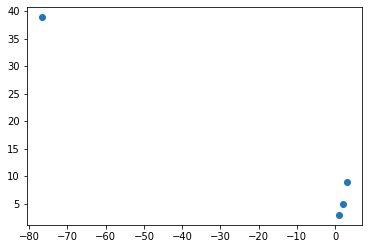

In [1]:
import matplotlib.pyplot as pp

pp.scatter((1,2,3, -76.612137), (3,5,9, 38.892063) )




